In [2]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
LS = pd.read_excel('table_LS.xlsx')

tp = pd.read_excel('Таблица платежей.xlsx')

1.Выполняем проверку данных.
2. Переименовываем столбцы
3. Смотрим на данные таблиц
    

In [4]:
LS.head()

ИД дома  ИД подъезда  ИД квартиры  Лицевой счет (ЛС)  Услуга  \
0      100         1624        43036              43036  ТО МКД   
1      100         1624        43037              43037  ТО МКД   
2      100         1624        43038              43038  ТО МКД   
3      100         1624        43039              43039  ТО МКД   
4      100         1624        43040              43040  ТО МКД   

   Ставка тарифа Статус услуги Дата начала услуги  
0            5.2       Активна         2008-01-23  
1            5.4       Активна         2008-01-23  
2            5.2       Активна         2008-01-23  
3            5.2       Активна         2008-01-23  
4            5.2       Активна         2008-01-23

In [5]:
ls = LS.rename(columns = {'ИД дома':'id_home', 'ИД подъезда':'id_entrance', 'ИД квартиры':'id_appartment', 
                     'Лицевой счет (ЛС)':'personal_account', 'Услуга':'service', 'Ставка тарифа':'tariff_rate', 
                     'Статус услуги':'status_s', 'Дата начала услуги':'date_to_begining'})

In [6]:
ls.dtypes

id_home                      int64
id_entrance                  int64
id_appartment                int64
personal_account             int64
service                     object
tariff_rate                float64
status_s                    object
date_to_begining    datetime64[ns]
dtype: object

In [7]:
ls.status_s.unique()

array(['Активна', 'Завершена', 'Не предоставляется', 'Отказ',
       'Приостановлена', 'Не обслуживается', 'Будет активна'],
      dtype=object)

In [8]:
ls.query('status_s == "Не обслуживается"')

id_home  id_entrance  id_appartment  personal_account service  \
6223      753         1035          30461             30461  ТО МКД   

      tariff_rate          status_s date_to_begining  
6223          5.4  Не обслуживается       2007-04-10

In [9]:
ls

id_home  id_entrance  id_appartment  personal_account service  \
0          100         1624          43036             43036  ТО МКД   
1          100         1624          43037             43037  ТО МКД   
2          100         1624          43038             43038  ТО МКД   
3          100         1624          43039             43039  ТО МКД   
4          100         1624          43040             43040  ТО МКД   
...        ...          ...            ...               ...     ...   
49538     5219         1884          49529             49069  ТО МКД   
49539     5219         1884          49530             49070  ТО МКД   
49540     5219         1884          49531             49071  ТО МКД   
49541     5219         1884          49532             49072  ТО МКД   
49542     5219         1884          49535             49075  ТО МКД   

       tariff_rate status_s date_to_begining  
0              5.2  Активна       2008-01-23  
1              5.4  Активна       2008-01-23  
2              5.2  Активна       2008-01-23  
3              5.2  Активна       2008-01-23  
4              5.2  Активна       2008-01-23  
...            ...      ...              ...  
49538          5.4  Активна       2019-03-28  
49539          5.2  Активна       2019-03-28  
49540          5.4  Активна       2019-03-28  
49541          5.4  Активна       2019-03-28  
49542          5.2  Активна       2019-03-28  

[49543 rows x 8 columns]

In [10]:
ls.service.unique()

array(['ТО МКД', 'ВБ', 'ТО Дверь', 'Рассрочка за Монтаж ВБ', 'ТО СВОД',
       'Рассрочка за Апгрейд ВБ'], dtype=object)

In [11]:
tp = tp.rename(columns = {'ЛС':'personal_account', 'Сумма платежа':'sum_pay', 'Дата загрузки':'date_to_load', 
                     'Источник платежа':'payment_source', 'способ оплаты':'payment_method', 'Комментарий к платежу':'comment'})

In [12]:
tp

personal_account  sum_pay date_to_load   payment_source  \
0                      1     4.80   2019-04-16      Ручной ввод   
1                      1    14.40   2018-10-17  Ввод из реестра   
2                      1    14.40   2019-01-21  Ввод из реестра   
3                      1    32.40   2020-12-11  Ввод из реестра   
4                      1    56.40   2018-02-09  Ввод из реестра   
...                  ...      ...          ...              ...   
356841             49148    31.20   2021-04-09  Ввод из реестра   
356842             49149    31.20   2021-04-27  Ввод из реестра   
356843             49150    25.81   2021-06-10      Ручной ввод   
356844             49151    20.63   2021-04-16  Ввод из реестра   
356845             49151    45.00   2021-07-07      Ручной ввод   

         payment_method comment  
0                  Офис     NaN  
1       Сбербанк России     NaN  
2               КС банк     NaN  
3               КС банк     NaN  
4               КС банк     NaN  
...                 ...     ...  
356841  Сбербанк России     NaN  
356842          КС банк     NaN  
356843          Выписки     NaN  
356844  Сбербанк России     NaN  
356845          Выписки     NaN  

[356846 rows x 6 columns]

In [13]:
tp.payment_source.unique()

array(['Ручной ввод', 'Ввод из реестра', 'Возврат', 'Сторно минус',
       'Авто. списание', 'Возврат списания', 'Ручное списание',
       'Сторно плюс'], dtype=object)

Сравниваем количество тарифов и количество услуг - разное количество

In [14]:
ls.service.nunique()


6

In [15]:
ls.tariff_rate.nunique()

10

Рассчитываем для каждого ЛС сумму всех поступивших платежей с учетом возвратов, но исключая списания. 

In [16]:
sum_pay_ = tp.query('payment_source !=["Авто. списание", "Ручное списание"] ' ) \
    .groupby('personal_account', as_index = False) \
    .agg({'sum_pay':'sum'})
sum_pay_

personal_account  sum_pay
0                     1   182.40
1                     2   236.40
2                     3   230.40
3                     4   236.40
4                     5   222.90
...                 ...      ...
39626             49146    62.40
39627             49148    31.20
39628             49149    31.20
39629             49150    25.81
39630             49151    65.63

[39631 rows x 2 columns]

In [53]:
sum_pay_.to_excel("Сумма платежей.xlsx")

3.Рассчитываем для каждого ЛС плановую выручку с учетом дат начала услуг на ЛС и ставки тарифа. Плановая выручка будет строиться от начала использования по активным услугам

In [17]:
tp['date_to_load'] = pd.to_datetime(tp['date_to_load'])

In [18]:
tp['at_month'] = tp.date_to_load.dt.to_period('M')

In [19]:
group_by_m = tp.groupby('at_month').agg({'personal_account':'count'})

In [20]:
ls['date_to_begining'] = pd.to_datetime(ls['date_to_begining'])

Выбираем активные услуги

In [21]:
ls_activ = ls.query('status_s == "Активна"') 

Вычисляем количество месяцев с даты начала пользования

In [22]:
ls_activ['count_m'] = (ls_activ.date_to_begining - pd.Timestamp.today().normalize())/np.timedelta64(1, 'M')

C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_4064/569049056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_activ['count_m'] = (ls_activ.date_to_begining - pd.Timestamp.today().normalize())/np.timedelta64(1, 'M')


In [23]:
ls_activ['count_m'] = ls_activ.count_m.round().abs()

C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_4064/2504755721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_activ['count_m'] = ls_activ.count_m.round().abs()


In [24]:
ls_activ

id_home  id_entrance  id_appartment  personal_account service  \
0          100         1624          43036             43036  ТО МКД   
1          100         1624          43037             43037  ТО МКД   
2          100         1624          43038             43038  ТО МКД   
3          100         1624          43039             43039  ТО МКД   
4          100         1624          43040             43040  ТО МКД   
...        ...          ...            ...               ...     ...   
49538     5219         1884          49529             49069  ТО МКД   
49539     5219         1884          49530             49070  ТО МКД   
49540     5219         1884          49531             49071  ТО МКД   
49541     5219         1884          49532             49072  ТО МКД   
49542     5219         1884          49535             49075  ТО МКД   

       tariff_rate status_s date_to_begining  count_m  
0              5.2  Активна       2008-01-23    171.0  
1              5.4  Активна       2008-01-23    171.0  
2              5.2  Активна       2008-01-23    171.0  
3              5.2  Активна       2008-01-23    171.0  
4              5.2  Активна       2008-01-23    171.0  
...            ...      ...              ...      ...  
49538          5.4  Активна       2019-03-28     37.0  
49539          5.2  Активна       2019-03-28     37.0  
49540          5.4  Активна       2019-03-28     37.0  
49541          5.4  Активна       2019-03-28     37.0  
49542          5.2  Активна       2019-03-28     37.0  

[39065 rows x 9 columns]

Умножаем тариф на количество месяцев

In [25]:
ls_activ['planned_revenue'] = ls_activ.tariff_rate * ls_activ.count_m

C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_4064/3816064242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_activ['planned_revenue'] = ls_activ.tariff_rate * ls_activ.count_m


Суммируем по каждому ЛС

In [26]:
planned_revenue = ls_activ.groupby('personal_account', as_index = False).agg({'planned_revenue':'sum'})
planned_revenue

personal_account  planned_revenue
0                     1             72.8
1                     2            910.0
2                     3           1015.2
3                     4            977.6
4                     5           1015.2
...                 ...              ...
38151             49149             86.4
38152             49150             81.0
38153             49151             75.6
38154             49152             48.6
38155             49153             48.6

[38156 rows x 2 columns]

In [49]:
planned_revenue.to_excel('плановая выручка.xlsx')

Вычисляем сальдо

In [27]:
saldo = planned_revenue.merge(sum_pay_, on = 'personal_account', how = 'left')
saldo

personal_account  planned_revenue  sum_pay
0                     1             72.8   182.40
1                     2            910.0   236.40
2                     3           1015.2   230.40
3                     4            977.6   236.40
4                     5           1015.2   222.90
...                 ...              ...      ...
38151             49149             86.4    31.20
38152             49150             81.0    25.81
38153             49151             75.6    65.63
38154             49152             48.6      NaN
38155             49153             48.6      NaN

[38156 rows x 3 columns]

In [28]:
saldo['saldo'] = saldo.planned_revenue - saldo.sum_pay
saldo

personal_account  planned_revenue  sum_pay   saldo
0                     1             72.8   182.40 -109.60
1                     2            910.0   236.40  673.60
2                     3           1015.2   230.40  784.80
3                     4            977.6   236.40  741.20
4                     5           1015.2   222.90  792.30
...                 ...              ...      ...     ...
38151             49149             86.4    31.20   55.20
38152             49150             81.0    25.81   55.19
38153             49151             75.6    65.63    9.97
38154             49152             48.6      NaN     NaN
38155             49153             48.6      NaN     NaN

[38156 rows x 4 columns]

In [50]:
saldo.to_excel('Сальдо.xlsx')

Частота выплат по квартирам

In [51]:
frequency_of_pay = tp.merge(ls, on = 'personal_account', how = 'left') \
                        .groupby(['id_appartment', 'at_month'], as_index = False) \
                        .agg({'date_to_load':'count'})
frequency_of_pay = frequency_of_pay.groupby('id_appartment', as_index = False).agg({'date_to_load':'mean'})
frequency_of_pay = frequency_of_pay.rename(columns = {'date_to_load':'frequency_of_pay'})
frequency_of_pay.to_excel('Частота выплат по квартирам.xlsx')
frequency_of_pay

id_appartment  frequency_of_pay
0                1.0          3.000000
1                2.0         16.666667
2                3.0          1.088235
3                4.0          1.000000
4                5.0          4.692308
...              ...               ...
41377        49547.0          1.000000
41378        49548.0          1.125000
41379        49550.0          1.000000
41380        49552.0          1.000000
41381        49553.0          1.000000

[41382 rows x 2 columns]

Количество оплаченных тарифов

In [52]:
count_service_pay = tp.merge(ls, on = 'personal_account', how = 'left') \
                        .groupby('id_appartment', as_index = False) \
                        .agg({'service':'count'}) \
                        .rename(columns = {'service':'count_service'})
count_service_pay.to_excel('Количество оплаченных тарифов.xlsx')
count_service_pay

id_appartment  count_service
0                1.0             18
1                2.0            100
2                3.0             37
3                4.0              4
4                5.0             61
...              ...            ...
41377        49547.0              1
41378        49548.0              9
41379        49550.0              1
41380        49552.0              1
41381        49553.0              1

[41382 rows x 2 columns]

In [31]:
ls.id_appartment.nunique()

42531

In [32]:
Визуализируем 

NameError: name 'Визуализируем' is not defined

In [38]:
tp_sum_at_month = tp.groupby('at_month', as_index = False).agg({'sum_pay':'sum'})


In [39]:
tp_sum_at_month['years'] = tp.date_to_load.dt.to_period('Y')
tp_sum_at_month

at_month     sum_pay years
0   2018-01  690603.983  2019
1   2018-02  306729.283  2018
2   2018-03  319303.652  2019
3   2018-04  169152.898  2020
4   2018-05   92526.231  2018
5   2018-06   88611.906  2020
6   2018-07  121335.232  2020
7   2018-08   62862.819  2020
8   2018-09   53932.536  2020
9   2018-10  117905.701  2020
10  2018-11   67976.803  2020
11  2018-12   70980.954  2020
12  2019-01  511040.500  2020
13  2019-02  544700.329  2020
14  2019-03  233760.848  2020
15  2019-04  177747.692  2020
16  2019-05   83707.910  2020
17  2019-06   97683.593  2020
18  2019-07  155535.884  2020
19  2019-08   74613.740  2020
20  2019-09   78633.716  2020
21  2019-10  160402.519  2020
22  2019-11   59926.176  2020
23  2019-12  825095.334  2020
24  2020-01  488813.615  2020
25  2020-02  156076.581  2020
26  2020-03  195678.114  2020
27  2020-04  113936.164  2020
28  2020-05  101878.118  2020
29  2020-06  102065.388  2020
30  2020-07  143064.357  2020
31  2020-08   74095.515  2020
32  2020-09   63632.000  2020
33  2020-10   80162.493  2020
34  2020-11   96905.873  2020
35  2020-12  842964.268  2020
36  2021-01  367441.019  2020
37  2021-02  168685.104  2020
38  2021-03  186975.419  2020
39  2021-04  136020.132  2020
40  2021-05   74938.718  2020
41  2021-06   88342.514  2020
42  2021-07  110007.207  2020
43  2021-08   31559.319  2020
44  2021-09  101080.632  2020
45  2021-10   24192.389  2020

Визуализируем сумму платежей по годам

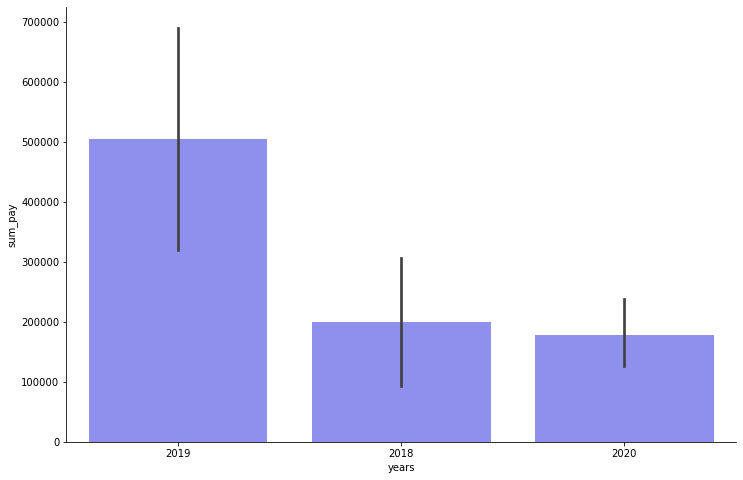

In [47]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='years', y='sum_pay', data=tp_sum_at_month, color='blue', alpha=0.5)
sns.despine()

Визуализируем сколько сумм платежей пришлос на каждый вид услуг

In [41]:
tpls = tp.merge(ls, on = 'personal_account')

In [42]:
tpls.groupby('service', as_index = False).agg({'sum_pay':'sum'})

service      sum_pay
0                       ВБ   305829.239
1  Рассрочка за Апгрейд ВБ     6727.450
2   Рассрочка за Монтаж ВБ    77289.762
3                 ТО Дверь   227153.466
4                   ТО МКД  8907332.723
5                  ТО СВОД   914087.470

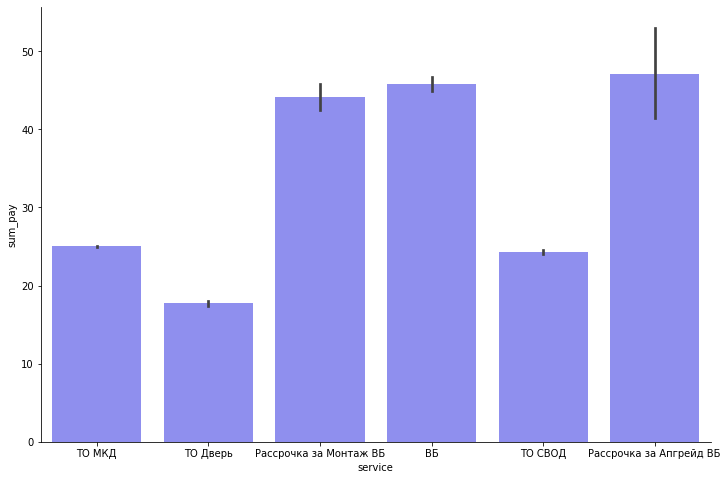

In [43]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='service', y='sum_pay', data=tpls, color='blue', alpha=0.5)
sns.despine()